In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [2]:
dataset=pd.read_csv('data.csv',encoding="ISO-8859-1")
dataset.describe()
dataset.tail()

C:\Users\Sai Harish G\AppData\Local\Temp\ipykernel_12684\4238621619.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('data.csv',encoding="ISO-8859-1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,24-12-2015
435738,SAMP,29-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,29-12-2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        10520 non-null   float64
 12  date                         435735 non-null  object 
dtyp

In [4]:

# dataset.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        10520 non-null   float64
 12  date                         435735 non-null  object 
dtyp

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,15.2,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,20.5,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,18.7,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,14.0,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,22.3,01-03-1990


In [5]:
total = dataset.isnull().sum()[dataset.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(dataset)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])


,total_missing,percent
pm2_5,425222,97.59
spm,237387,54.48
agency,149481,34.30
stn_code,144077,33.06
rspm,40222,9.23
so2,34646,7.95
location_monitoring_station,27491,6.31
no2,16233,3.73
type,5393,1.24
date,7,0.00


In [6]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    #return df_out

remove_outlier(dataset,'so2')
remove_outlier(dataset,'no2')
remove_outlier(dataset,'rspm')
remove_outlier(dataset,'spm')


In [7]:
dataset.groupby('state')[['spm', 'pm2_5', 'rspm', 'so2', 'no2']].mean()




,spm,pm2_5,rspm,so2,no2
state,,,,,
Andhra Pradesh,200.260378,186.278765,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,NaN,76.629213,3.179104,5.469697
Assam,153.355386,NaN,93.724912,6.723263,14.793691
Bihar,276.917416,NaN,123.705176,19.381476,36.575525
Chandigarh,206.056150,NaN,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,NaN,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,30.511628,76.536530,8.939587,18.293959
Daman & Diu,145.681416,27.886364,73.749431,8.192958,16.168926
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147


In [8]:
# Calculate the average of selected columns
selected_columns = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
column_means = dataset[selected_columns].mean()

print("Average of selected columns:")
print(column_means)


Average of selected columns:
so2       10.829414
no2       25.809623
rspm     108.832784
spm      220.783480
pm2_5     57.469954
dtype: float64


In [9]:
by_State=dataset.groupby('state')

def impute_mean(series):
    return series.fillna(series.mean())

dataset['rspm']=by_State['rspm'].transform(impute_mean)
dataset['so2']=by_State['so2'].transform(impute_mean)
dataset['no2']=by_State['no2'].transform(impute_mean)
dataset['spm']=by_State['spm'].transform(impute_mean)
dataset['pm2_5']=by_State['pm2_5'].transform(impute_mean)



In [10]:
for col in dataset.columns.values:
    if dataset[col].isnull().sum() == 0:
        continue
    if col == 'date':
        guess_values = dataset.groupby('state')['date'].apply(lambda x: x.mode().max())
    elif col=='type':
        guess_values = dataset.groupby('state')['type'].apply(lambda x: x.mode().max())
    else:
        guess_values = dataset.groupby('state')['location'].apply(lambda x: x.mode().max())
dataset.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,15.2,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,20.5,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,18.7,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,14.0,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,22.3,01-03-1990


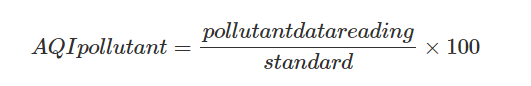

In [11]:
from IPython.display import Image, display
import pandas as pd
# Specify the path to your image file with double backslashes
image_path = 'Screenshot 2024-01-21 003647.png'

# Display the image
display(Image(filename=image_path))

dataset=pd.read_csv('cleaned_data.csv',encoding="ISO-8859-1")


In [12]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
dataset['si']=dataset['Sulfur Dioxide(So2)'].apply(calculate_si)
df= dataset[['Sulfur Dioxide(So2)','si']]
df.head()

,Sulfur Dioxide(So2),si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [13]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
dataset['ni']=dataset['Nitrogen Dioxide (No2)'].apply(calculate_ni)
df= dataset[['Nitrogen Dioxide (No2)','ni']]
df.head()


,Nitrogen Dioxide (No2),ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [14]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
dataset['rpi']=dataset['Respirable Suspended Particulate Matter '].apply(calculate_si)
df= dataset[['Respirable Suspended Particulate Matter ','rpi']]
df.head()


,Respirable Suspended Particulate Matter,rpi
0,78.182824,97.72853
1,78.182824,97.72853
2,78.182824,97.72853
3,78.182824,97.72853
4,78.182824,97.72853


In [15]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
dataset['spi']=dataset['Suspended Particulate Matter'].apply(calculate_spi)
df= dataset[['Suspended Particulate Matter','spi']]
df.head()


,Suspended Particulate Matter,spi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


In [16]:
#Function to calculate pm2_5 individual pollutant index(pmi)
def calculate_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
dataset['pmi']=dataset['PM_2.5'].apply(calculate_pmi)
df= dataset[['PM_2.5','pmi']]
df.head()

,PM_2.5,pmi
0,15.2,15.2
1,20.5,20.5
2,18.7,18.7
3,14.0,14.0
4,22.3,22.3


In [17]:
import os 
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
dataset['AQI']=dataset.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= dataset[['state','si','ni','rpi','spi','AQI']]
df.head()
dataset.to_csv('indexes.csv', index=False)
dataset=pd.read_csv('indexes.csv',encoding="ISO-8859-1")

In [18]:
dataset['date'] = pd.to_datetime(dataset['date'], format='%d-%m-%Y')
dataset['year'] = dataset['date'].dt.year # year
dataset['year'] = dataset['year'].fillna(0.0).astype(int)
dataset = dataset[(dataset['year']>0)]

df = dataset[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
dataset.tail()

C:\Users\Sai Harish G\AppData\Local\Temp\ipykernel_12684\2910788078.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = dataset[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)


,sampling_date,state,location,type,Sulfur Dioxide(So2),Nitrogen Dioxide (No2),Respirable Suspended Particulate Matter,Suspended Particulate Matter,PM_2.5,date,si,ni,rpi,spi,pmi,AQI,year
54,September - M091991,Andhra Pradesh,Hyderabad,Industrial Area,13.3,11.9,78.182824,56.0,33.938889,1991-09-01,16.625,14.875,97.72853,56.000000,33.938889,97.728530,1991
55,September - M091991,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.0,23.4,78.182824,120.0,34.250556,1991-09-01,7.500,29.250,97.72853,113.333333,34.250556,113.333333,1991
56,October - M101991,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",8.5,15.5,78.182824,135.0,34.562222,1991-10-01,10.625,19.375,97.72853,123.333333,34.562222,123.333333,1991
57,October - M101991,Andhra Pradesh,Hyderabad,Industrial Area,12.3,12.2,78.182824,83.0,34.873889,1991-10-01,15.375,15.250,97.72853,83.000000,34.873889,97.728530,1991
58,October - M101991,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,25.7,78.182824,158.0,35.185556,1991-10-01,7.750,32.125,97.72853,138.666667,35.185556,138.666667,1991


In [19]:
dataset.fillna(0.0,inplace=True)
states=dataset.groupby(['state','location'],as_index=False).mean()
state=states.groupby(['state',],as_index=False).mean()
state
selected_columns = ['state','date','si', 'ni', 'rpi', 'spi', 'pmi','AQI']
new_dataframe = dataset[selected_columns]

# Save the new DataFrame to a CSV file
new_dataframe.to_csv('only_indexes.csv', index=False)

C:\Users\Sai Harish G\AppData\Local\Temp\ipykernel_12684\221539142.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states=dataset.groupby(['state','location'],as_index=False).mean()
C:\Users\Sai Harish G\AppData\Local\Temp\ipykernel_12684\221539142.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state=states.groupby(['state',],as_index=False).mean()


In [20]:
dataset['date'] = pd.to_datetime(dataset['date'],format='%Y-%m-%d') # date parse
dataset['year'] = dataset['date'].dt.year # year
dataset['year'] = dataset['year'].fillna(0.0).astype(int)
dataset = dataset[(dataset['year']>0)]

In [21]:
import numpy as np

# Assuming 'dataset' is your DataFrame containing the data
data_p = dataset.drop(["sampling_date", "state", "location", "type", "date", "si", "ni", "rpi", "spi", "pmi", "AQI"], axis=1)
corr = data_p.corr()

# Selecting columns with correlation greater than a threshold
threshold = 0.1 # Adjust threshold as needed
selected_columns = corr[abs(corr) > threshold].index

# Creating a DataFrame with selected columns
data_p_selected = data_p[selected_columns]

# Printing the correlation matrix of selected columns
print(data_p_selected.corr())

                                          Sulfur Dioxide(So2)  \
Sulfur Dioxide(So2)                                  1.000000   
Nitrogen Dioxide (No2)                               0.180410   
Respirable Suspended Particulate Matter                   NaN   
Suspended Particulate Matter                        -0.110046   
PM_2.5                                               0.121162   
year                                                 0.117494   

                                          Nitrogen Dioxide (No2)  \
Sulfur Dioxide(So2)                                     0.180410   
Nitrogen Dioxide (No2)                                  1.000000   
Respirable Suspended Particulate Matter                      NaN   
Suspended Particulate Matter                            0.375335   
PM_2.5                                                  0.048900   
year                                                    0.147494   

                                          Respirable Suspended Part

In [22]:
def linear_regression(X, y):
    # SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # One Hot Encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

    # Linear Regression
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)

    print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)
    print('r2_Square: %.2f ' % r2_score(y_test, predictions))
    print('MSE: %.2f ' % np.sqrt(mean_squared_error(y_test, predictions)))
    print("KfoldCrossVal mean score using Linear regression is %s" % cross_val_score(LR, X_train, y_train, cv=10).mean())

    regressor_OLS = sm.OLS(y_train, X_train).fit()

    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, y_test, alpha=0.5, s=100)  # Adjust marker size
    plt.plot(np.unique(predictions), np.poly1d(np.polyfit(predictions, y_test, 1))(np.unique(predictions)), color='red')  # Add trendline
    plt.xlabel('Predictions')
    plt.ylabel('AQI')
    plt.title("Linear Prediction")
    plt.grid(True)  # Add gridlines
    plt.show()

    # Print regression summary
    print(regressor_OLS.summary())


(12, 4) (47, 4) (12,) (47,)
r2_Square: 0.96 
MSE: 11.10 
KfoldCrossVal mean score using Linear regression is 0.9142794285394938


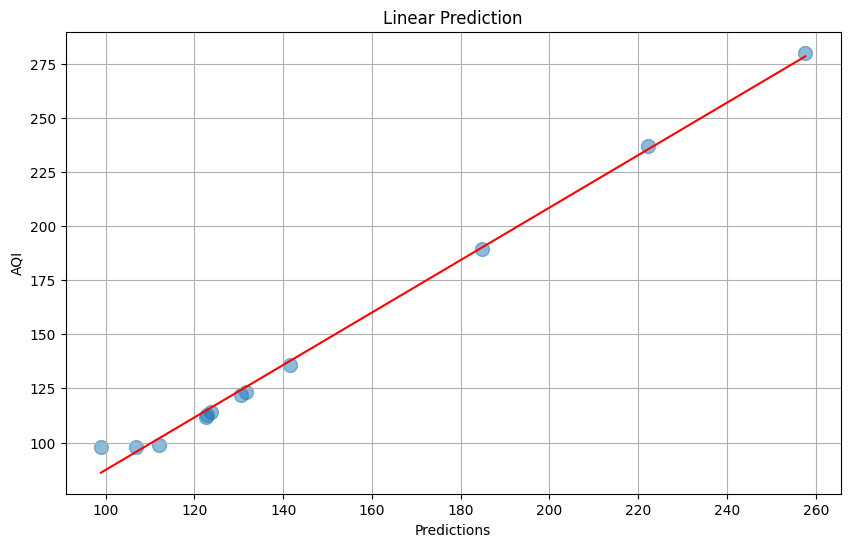

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     302.5
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           6.48e-29
Time:                        15:50:41   Log-Likelihood:                -163.55
No. Observations:                  47   AIC:                             335.1
Df Residuals:                      43   BIC:                             342.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
si            -0.0075      0.128     -0.059      0.9

In [23]:
# print(dataset.columns)

X_1=dataset[['si','ni','rpi','spi']]
y_1=dataset['AQI']
linear_regression(X_1,y_1)

In [24]:
def polynomial_regression(X, y, degree=2):
    # SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # One Hot Encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

    # Polynomial Regression
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    LR_poly = LinearRegression()
    LR_poly.fit(X_train_poly, y_train)
    predictions_poly = LR_poly.predict(X_test_poly)

    print(X_test_poly.shape, X_train_poly.shape, y_test.shape, y_train.shape)
    print('r2_Square (Polynomial): %.2f ' % r2_score(y_test, predictions_poly))
    print('MSE (Polynomial): %.2f ' % np.sqrt(mean_squared_error(y_test, predictions_poly)))
    print("KfoldCrossVal mean score using Polynomial regression is %s" % cross_val_score(LR_poly, X_train_poly, y_train, cv=10).mean())

    plt.figure(figsize=(10, 6))
    plt.scatter(predictions_poly, y_test, alpha=0.5, s=100)  # Adjust marker size
    plt.plot(np.unique(predictions_poly), np.poly1d(np.polyfit(predictions_poly, y_test, 1))(np.unique(predictions_poly)), color='red')  # Add trendline
    plt.xlabel('Predictions (Polynomial)')
    plt.ylabel('AQI')
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.grid(True)  # Add gridlines
    plt.show()

    return LR_poly

def cross_val(X, y, degree=1):
    # SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # One Hot Encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    linear_regression_score = cross_val_score(LR, X_train, y_train, cv=10).mean()
    print("KfoldCrossVal mean score using Linear regression is %s" % linear_regression_score)

    # Polynomial Regression
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train, y_train)
    polynomial_regression_score = cross_val_score(poly_model, X_train, y_train, cv=10).mean()
    print("KfoldCrossVal mean score using Polynomial regression (degree {}) is {}".format(degree, polynomial_regression_score))


(12, 14) (47, 14) (12,) (47,)
r2_Square (Polynomial): 0.97 
MSE (Polynomial): 4.87 
KfoldCrossVal mean score using Polynomial regression is 0.9505191878213065


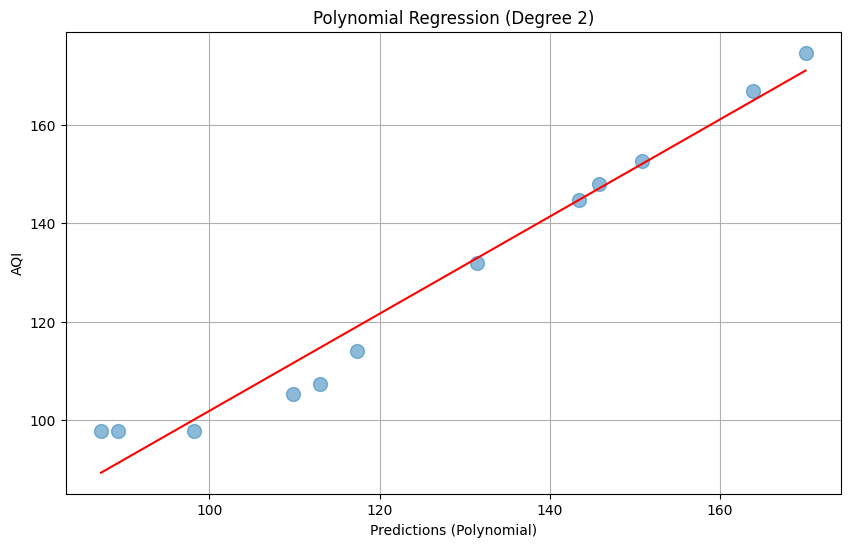

LinearRegression()

In [25]:

polynomial_regression(X_1, y_1, degree=2)


Add  spi                            with p-value 2.16216e-35
Add  rpi                            with p-value 7.61923e-08


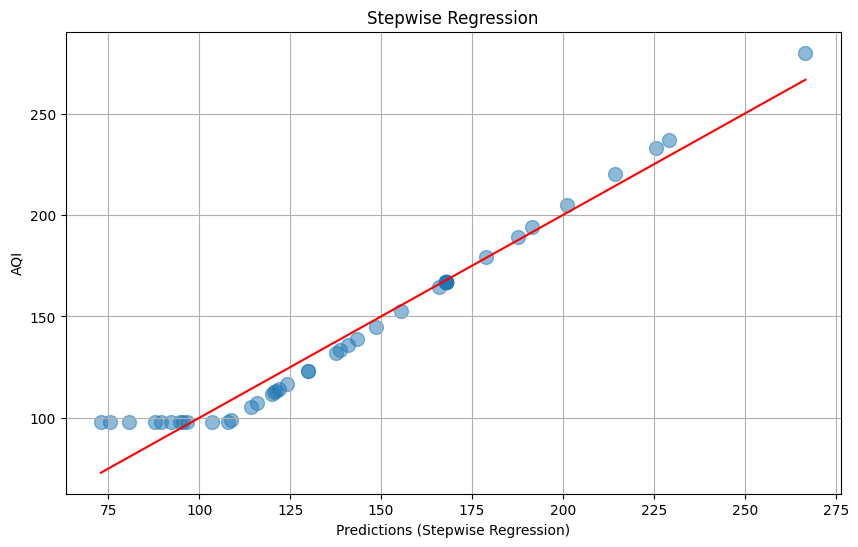

(47, 2) (47, 4) (47,)
r2_Square (Stepwise): 0.97 
MSE (Stepwise): 7.82 
KfoldCrossVal mean score using Stepwise regression is 0.9353205051622375


In [26]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin

class StatsmodelsWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model
        self.model_fit = None

    def fit(self, X, y):
        self.fitted_model = sm.OLS(y, sm.add_constant(X)).fit()
        return self

    def predict(self, X):
        if self.fitted_model is not None:
            return self.fitted_model.predict(sm.add_constant(X))

def stepwise_regression(X, y, 
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out=0.05, 
                        verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        
        for new_column in excluded:
            model_columns = included + [new_column]
            X_model = sm.add_constant(X[model_columns])
            model = sm.OLS(y, X_model).fit()
            new_pval[new_column] = model.pvalues[new_column]
        
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        X_model = sm.add_constant(X[included])
        model = sm.OLS(y, X_model).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break

    # Scatter plot for Stepwise Regression
    X_stepwise = sm.add_constant(X[included])
    model_stepwise = sm.OLS(y, X_stepwise).fit()
    predictions_stepwise = model_stepwise.predict(X_stepwise)

    plt.figure(figsize=(10, 6))
    plt.scatter(predictions_stepwise, y, alpha=0.5, s=100)  # Adjust marker size
    plt.plot(np.unique(predictions_stepwise), np.poly1d(np.polyfit(predictions_stepwise, y, 1))(np.unique(predictions_stepwise)), color='red')  # Add trendline
    plt.xlabel('Predictions (Stepwise Regression)')
    plt.ylabel('AQI')
    plt.title('Stepwise Regression')
    plt.grid(True)  # Add gridlines
    plt.show()

    # Print metrics
    print(X_stepwise.shape, X.shape, y.shape)
    print('r2_Square (Stepwise): %.2f ' % r2_score(y, predictions_stepwise))
    print('MSE (Stepwise): %.2f ' % np.sqrt(mean_squared_error(y, predictions_stepwise)))
    print("KfoldCrossVal mean score using Stepwise regression is %s" % cross_val_score(StatsmodelsWrapper(model_stepwise), X_stepwise, y, cv=10).mean())

    return included, StatsmodelsWrapper(model_stepwise)

def cross_val_stepwise(X, y):
    # SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # One Hot Encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

    # Stepwise Regression
    selected_features, stepwise_model = stepwise_regression(X_train, y_train)

    # Cross-validation
    kfold = KFold(len(X), shuffle=True)
    mse_scores = cross_val_score(stepwise_model, X_train[selected_features], y_train, cv=10, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(stepwise_model, X_train[selected_features], y_train, cv=10, scoring='r2')

    # Calculate R-squared
    r2_mean = r2_scores.mean()

    return mse_scores, r2_scores

# Example usage
X = dataset[['si', 'ni', 'rpi', 'spi']]
y = dataset['AQI']

# Cross-validation with Stepwise Regression
mse_scores_stepwise, r2_scores_stepwise = cross_val_stepwise(X, y)


KfoldCrossVal mean score using Ridge regression is 0.8564158960106143 

Ridge Analysis Report
Mean Squared Error (MSE): 116.2214
R-squared (R2): 0.9535


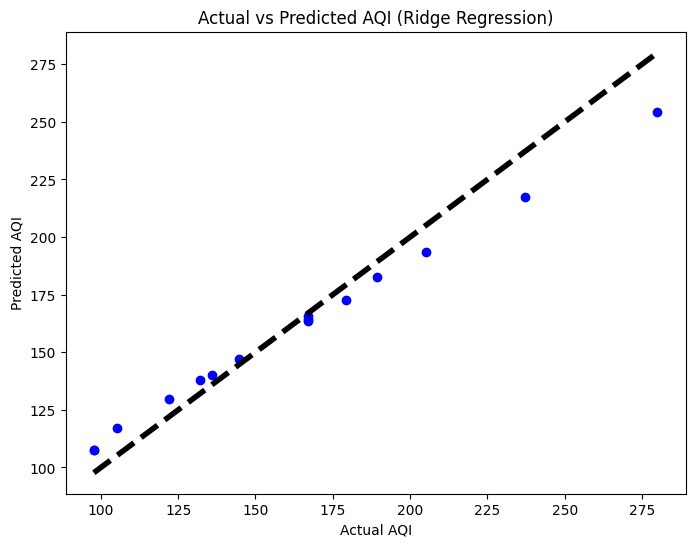

Ridge Model Summary
                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3470.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.20e-16
Time:                        15:50:42   Log-Likelihood:                -28.555
No. Observations:                  15   AIC:                             65.11
Df Residuals:                      11   BIC:                             67.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4750      0.528

c:\Users\Sai Harish G\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [27]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load dataset (assuming 'indexes.csv' is your dataset)
dataset = pd.read_csv('indexes.csv', encoding="ISO-8859-1")

# Assuming 'AQI' is your target variable and 'si', 'ni', 'rpi', 'spi' are features
# Please replace these with the actual column names from your dataset
X = dataset[['si', 'ni', 'rpi', 'spi']]
y = dataset['AQI']

def ridge_regression(x, y, alpha=1.0):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
    sc = StandardScaler()

    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    # Fitting Ridge regression to the training set
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(x_train, y_train)

    # Ridge regression cross-validation
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    cvs = cross_val_score(ridge, x_train, y_train, cv=k_fold).mean()
    print("KfoldCrossVal mean score using Ridge regression is %s \n" % cvs)

    print("Ridge Analysis Report")
    y_pred = ridge.predict(x_test)
    print("Mean Squared Error (MSE): %.4f" % mean_squared_error(y_test, y_pred))
    print("R-squared (R2): %.4f" % r2_score(y_test, y_pred))

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual AQI')
    plt.ylabel('Predicted AQI')
    plt.title('Actual vs Predicted AQI (Ridge Regression)')
    plt.show()

    return mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred), x_test, y_test  # Return MSE, R2, x_test, and y_test
def ridge_summary(y, X, alpha=1.0):
    ridge_model = sm.OLS(y, X)
    ridge_result = ridge_model.fit()
    print("Ridge Model Summary")
    print(ridge_result.summary())
    print("Coefficients:")
    print(ridge_result.params)
    print("\nStandard errors:")
    print(ridge_result.bse)
    print("\nR-squared (R2): %.4f" % ridge_result.rsquared)
    print("\nNumber of observations: %d" % ridge_result.nobs)

# Example usage
ridge_alpha = 1.0
mse, r2, x_test_data, y_test_data = ridge_regression(X, y, alpha=ridge_alpha)
ridge_summary(y_test_data, sm.add_constant(x_test_data), alpha=ridge_alpha)

# Print the MSE and R2
print("Mean Squared Error (MSE): %.4f" % mse)
print("R-squared (R2): %.4f" % r2)
print(X.shape)
print(y.shape)